# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Reading dataset

In [2]:
data = pd.read_excel("project covid.xlsx")

In [3]:
data.isna().sum()

AGE             1048276
SEX             1048276
BODY PAIN       1048276
SORE THROAT     1048274
OXYGEN LEVEL    1048274
TEMPERATURE     1048274
DIARRHOEA       1048276
WBC             1048274
LYMPHOCYTE      1048274
NEUTROLPHIL     1048274
B.P             1048274
SUGAR           1048274
VACCINE 1       1048276
VACCINE 2       1048275
TARGET          1048274
dtype: int64

In [4]:
df = data.dropna(subset=['AGE'])

In [17]:
df.to_csv("covid_dataset.csv", index=0)

In [5]:
check =pd.read_csv("covid_dataset.csv")

In [8]:
data = check.copy()

In [14]:
data.dtypes

AGE             int32
SEX             int32
BODY PAIN       int32
SORE THROAT     int64
OXYGEN LEVEL    int64
TEMPERATURE     int64
DIARRHOEA       int32
WBC             int64
LYMPHOCYTE      int64
NEUTROLPHIL     int64
B.P             int64
SUGAR           int64
VACCINE 1       int32
VACCINE 2       int64
TARGET          int32
dtype: object

In [10]:
cols = ['AGE', 'SEX', 'BODY PAIN', 'DIARRHOEA', 'VACCINE 1 ', 'TARGET']


In [11]:
data.columns

Index(['AGE', 'SEX', 'BODY PAIN', 'SORE THROAT', 'OXYGEN LEVEL', 'TEMPERATURE',
       'DIARRHOEA', 'WBC', 'LYMPHOCYTE ', 'NEUTROLPHIL', 'B.P', 'SUGAR',
       'VACCINE 1 ', 'VACCINE 2 ', 'TARGET'],
      dtype='object')

In [35]:
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [36]:
data.dtypes

AGE             float64
SEX             float64
BODY PAIN       float64
SORE THROAT       int64
OXYGEN LEVEL      int64
TEMPERATURE       int64
DIARRHOEA       float64
WBC               int64
LYMPHOCYTE        int64
NEUTROLPHIL       int64
B.P               int64
SUGAR             int64
VACCINE 1       float64
VACCINE 2         int64
TARGET          float64
dtype: object

In [12]:
data[cols]= data[cols].astype(int)

In [13]:
data.head()

,AGE,SEX,BODY PAIN,SORE THROAT,OXYGEN LEVEL,TEMPERATURE,DIARRHOEA,WBC,LYMPHOCYTE,NEUTROLPHIL,B.P,SUGAR,VACCINE 1,VACCINE 2,TARGET
0,63,1,0,0,96,101,0,5500,1100,1700,100,99,1,1,0
1,37,0,1,0,97,100,1,10000,1000,8500,85,125,1,1,0
2,41,0,0,0,96,101,0,5700,1100,1800,90,95,1,0,0
3,56,0,1,1,94,102,1,11000,900,11000,180,126,1,0,1
4,57,1,0,0,96,101,0,6000,1300,1900,80,96,1,1,0


In [44]:
data.columns

Index(['AGE', 'SEX', 'BODY PAIN', 'SORE THROAT', 'OXYGEN LEVEL', 'TEMPERATURE',
       'DIARRHOEA', 'WBC', 'LYMPHOCYTE ', 'NEUTROLPHIL', 'B.P', 'SUGAR',
       'VACCINE 1 ', 'VACCINE 2 ', 'TARGET'],
      dtype='object')

<AxesSubplot:>

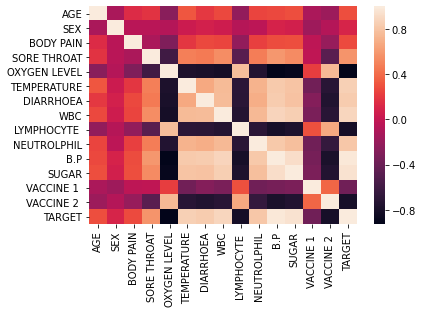

In [58]:
sns.heatmap(data.corr())

In [19]:
df = data.copy()

<AxesSubplot:>

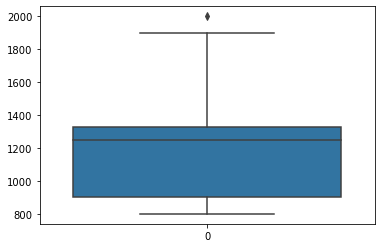

In [20]:
sns.boxplot(data= data['LYMPHOCYTE '])

In [21]:
percentiles = df['LYMPHOCYTE '].quantile([0.1,0.9]).values


In [22]:
percentiles

array([ 900., 1700.])

In [23]:
df['LYMPHOCYTE '] = df['LYMPHOCYTE '].clip(percentiles[0],percentiles[1])

<AxesSubplot:>

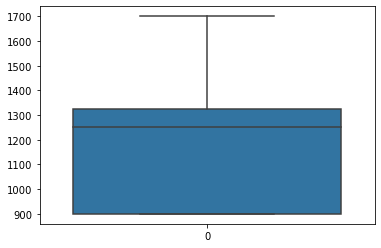

In [24]:
sns.boxplot(data= df['LYMPHOCYTE '])

In [25]:
df['TARGET'].value_counts()

0    174
1    125
Name: TARGET, dtype: int64

# Training model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET',axis=1), 
                                                    df['TARGET'], test_size=0.30, 
                                                    random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        40

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# Saving model

In [35]:
import pickle


In [37]:
filename = "log_model_pickle.pkl"
pickle.dump(logmodel, open(filename, "wb"))

In [38]:
loaded_model = pickle.load(open("log_model_pickle.pkl", 'rb'))

# Loading model

In [ ]:
import pandas as pd
imoort numpy as np
import pickle

loaded_model = pickle.load(open("model.pkl", "rb"))

@app.route('/')
def home():
    return render_template("home.html")

@app.route('/predict',methods=['POST'])
def predict():
    int_features = [x for x in request.form.values()]
    final = np.array(int_features)
    data_unseen = np.array(final.reshape(1,-1)
    #data_unseen = pd.DataFrame([final], columns = cols)
    #prediction = predict_model(model, data=data_unseen, round = 0)
    
    result = loaded_model.predict(data_unseen)
    result = result[0]
    if int(result)==1:
        prediction = "WELCOME TO COVID FAMILY"
    else:
        prediction = "YOU ARE FREE TO GO"
    
    return render_template("result.html", prediction = prediction)
    #prediction = int(prediction.Label[0])
    #return render_template('home.html',pred='Expected Bill will be {}'.format(prediction))
